<a href="https://colab.research.google.com/github/laussin86/laussin86/blob/main/Loan_Default_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
#1. Check the datatypes of the attributes. (3 points)
df = pd.read_csv('accepted_2007_to_2018Q4.csv',
                 usecols=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                          'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                          'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',"addr_state",
                          'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
                          'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                          'mort_acc', 'pub_rec_bankruptcies'])
print(df.dtypes)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                      object
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object


In [ ]:
#2. Are there any missing values in the dataset?
df.isnull().sum()

loan_amnt                   4
term                        4
int_rate                    4
installment                 4
grade                       4
sub_grade                   4
emp_title               41531
emp_length              41171
home_ownership              4
annual_inc                  5
verification_status         5
issue_d                     5
loan_status                 5
purpose                     6
title                     137
addr_state                  5
dti                       439
earliest_cr_line            5
open_acc                    7
pub_rec                     5
revol_bal                   5
revol_util                430
total_acc                   5
initial_list_status         5
application_type            7
mort_acc                    8
pub_rec_bankruptcies        9
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1011023.0,15252.084547,9242.814862,1000.00,8000.00,13175.00,20000.00,4.000000e+04
int_rate,1011023.0,12.784571,4.844602,5.31,9.17,12.29,15.61,3.099000e+01
installment,1011023.0,447.584258,267.151439,14.01,253.78,379.14,595.41,1.719830e+03
annual_inc,1011023.0,78306.306190,133050.784472,0.00,46000.00,65000.00,94000.00,1.100000e+08
open_acc,1011020.0,11.778658,5.755622,0.00,8.00,11.00,15.00,9.300000e+01
pub_rec,1011022.0,0.210400,0.595688,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,1011022.0,16930.095570,23359.201318,0.00,5953.00,11372.00,20490.00,2.904836e+06
revol_util,1010319.0,49.880655,25.290522,0.00,31.10,49.60,68.70,5.776000e+03
total_acc,1011022.0,24.263981,12.086754,2.00,15.00,22.00,31.00,1.730000e+02
mort_acc,1011019.0,1.574179,46.882182,0.00,0.00,1.00,3.00,4.710400e+04


In [9]:
#3. What is the correlation between the attributes other than loan_status?
dfq = df.loc[:, df.columns !='loan_status']
dfq.corr()

,loan_amnt,int_rate,installment,annual_inc,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.094170,0.943645,0.170077,0.178783,-0.063237,0.321630,0.104284,0.197863,0.008845,-0.081673
int_rate,0.094170,1.000000,0.121529,-0.047544,-0.012252,0.054655,-0.037213,0.227121,-0.047795,-0.004939,0.057725
installment,0.943645,0.121529,1.000000,0.163425,0.166113,-0.049941,0.304998,0.118942,0.174078,0.007486,-0.072114
annual_inc,0.170077,-0.047544,0.163425,1.000000,0.078326,-0.002231,0.161434,0.025120,0.096090,0.004307,-0.022307
open_acc,0.178783,-0.012252,0.166113,0.078326,1.000000,-0.016228,0.237777,-0.137001,0.724589,0.004796,-0.015033
pub_rec,-0.063237,0.054655,-0.049941,-0.002231,-0.016228,1.000000,-0.089261,-0.048812,0.008554,-0.000706,0.603206
revol_bal,0.321630,-0.037213,0.304998,0.161434,0.237777,-0.089261,1.000000,0.246642,0.202252,0.008350,-0.105348
revol_util,0.104284,0.227121,0.118942,0.025120,-0.137001,-0.048812,0.246642,1.000000,-0.100917,0.000645,-0.073292
total_acc,0.197863,-0.047795,0.174078,0.096090,0.724589,0.008554,0.202252,-0.100917,1.000000,0.013386,0.031188
mort_acc,0.008845,-0.004939,0.007486,0.004307,0.004796,-0.000706,0.008350,0.000645,0.013386,1.000000,-0.000551


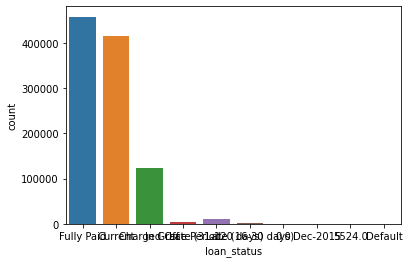

In [12]:
#4. Graph the frequency distribution of loan status.
ax = sns.countplot(x="loan_status",data=df)